In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [9]:
df = pd.read_csv('../data/raw/eu_analysis_data.csv')

In [10]:
df.head(15)

,geo,time,building_permits,construction_prices,house_price_index,immigration,inflation_rate,living_with_parents,marriage_rate,net_earnings,pop_change,pop_density,poverty_rate,price_income_ratio,unemployment_rate
0,AT,2005,64.2,2.3,NaN,114465.0,82.299167,44.5,NaN,22783.76,NaN,NaN,24.8,88.36,NaN
1,AT,2006,68.6,3.0,NaN,98535.0,83.687500,45.8,NaN,23391.46,NaN,NaN,24.3,87.84,NaN
2,AT,2007,69.1,4.1,NaN,72862.0,85.529167,47.0,NaN,23970.23,NaN,NaN,24.4,87.34,NaN
3,AT,2008,71.3,4.7,NaN,73772.0,88.287500,46.0,NaN,24492.09,NaN,NaN,26.7,85.66,NaN
4,AT,2009,70.3,2.3,NaN,69295.0,88.642500,47.4,NaN,25427.88,NaN,NaN,25.8,85.60,5.7
5,AT,2010,75.5,1.7,NaN,70978.0,90.144167,46.9,NaN,25770.16,NaN,NaN,26.4,86.18,5.2
6,AT,2011,85.3,2.9,5.4,82230.0,93.345000,46.5,4.3,26375.67,NaN,101.8,27.4,89.63,4.9
7,AT,2012,76.4,2.6,6.6,91557.0,95.745833,45.9,4.6,26893.06,5.2,102.3,26.4,91.83,5.2
8,AT,2013,83.0,2.4,5.0,101866.0,97.773333,47.1,4.3,27520.54,6.6,102.9,26.9,96.93,5.7
9,AT,2014,84.4,2.3,3.8,116262.0,99.201667,45.4,4.4,27965.34,9.0,103.7,26.6,98.82,6.0


In [11]:
df.isnull().sum()

geo                      0
time                     0
building_permits         0
construction_prices      0
house_price_index       83
immigration             40
inflation_rate           0
living_with_parents      7
marriage_rate          196
net_earnings            22
pop_change             189
pop_density            189
poverty_rate             9
price_income_ratio       6
unemployment_rate      100
dtype: int64

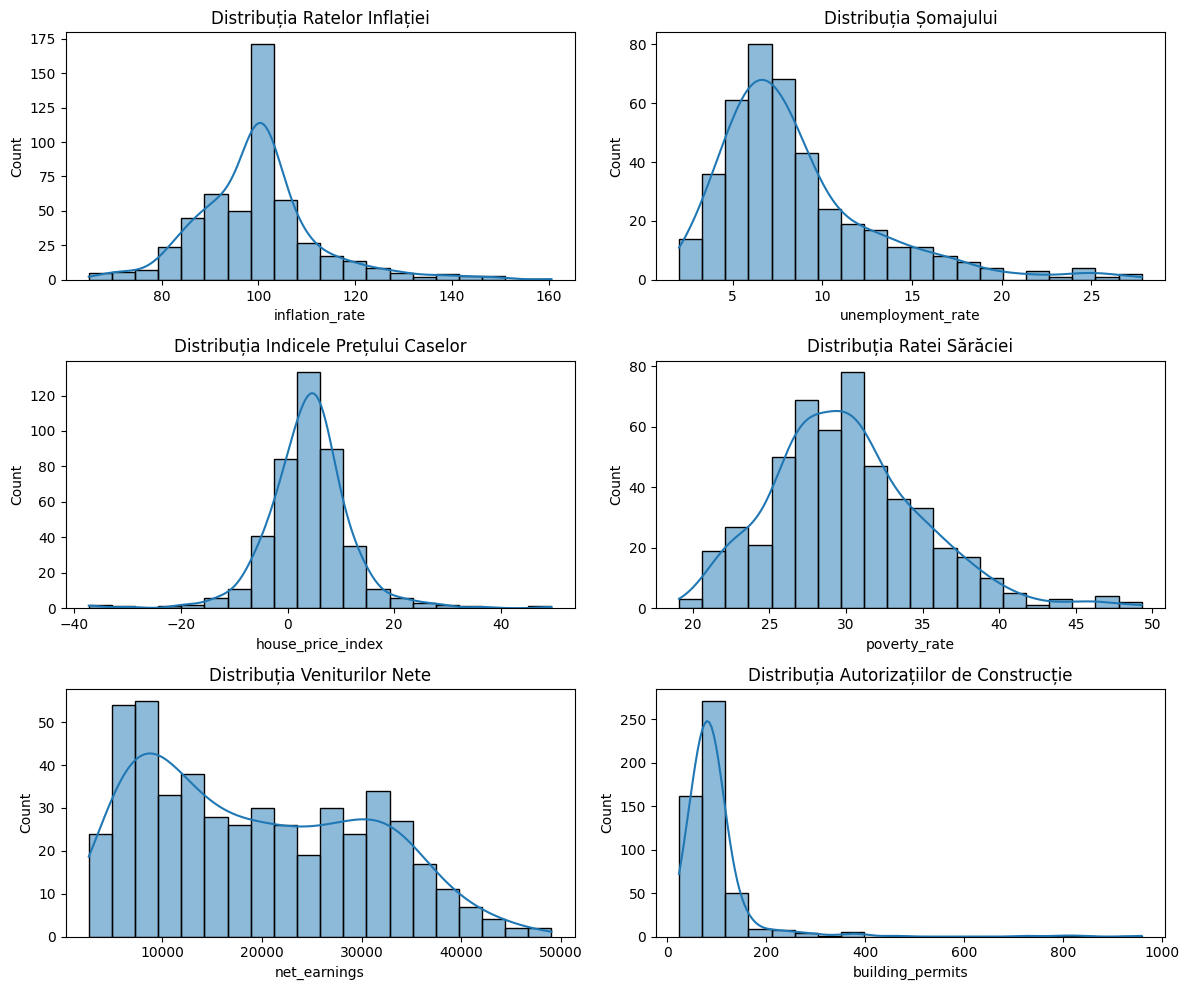

In [12]:
# Setăm stilul graficelor
# sns.set_style("whitegrid")

# Histograme pentru variabilele principale
fig, axes = plt.subplots(3, 2, figsize=(12, 10))

sns.histplot(df["inflation_rate"], bins=20, kde=True, ax=axes[0, 0]).set_title("Distribuția Ratelor Inflației")
sns.histplot(df["unemployment_rate"], bins=20, kde=True, ax=axes[0, 1]).set_title("Distribuția Șomajului")
sns.histplot(df["house_price_index"], bins=20, kde=True, ax=axes[1, 0]).set_title("Distribuția Indicele Prețului Caselor")
sns.histplot(df["poverty_rate"], bins=20, kde=True, ax=axes[1, 1]).set_title("Distribuția Ratei Sărăciei")
sns.histplot(df["net_earnings"], bins=20, kde=True, ax=axes[2, 0]).set_title("Distribuția Veniturilor Nete")
sns.histplot(df["building_permits"], bins=20, kde=True, ax=axes[2, 1]).set_title("Distribuția Autorizațiilor de Construcție")

plt.tight_layout()
plt.show()

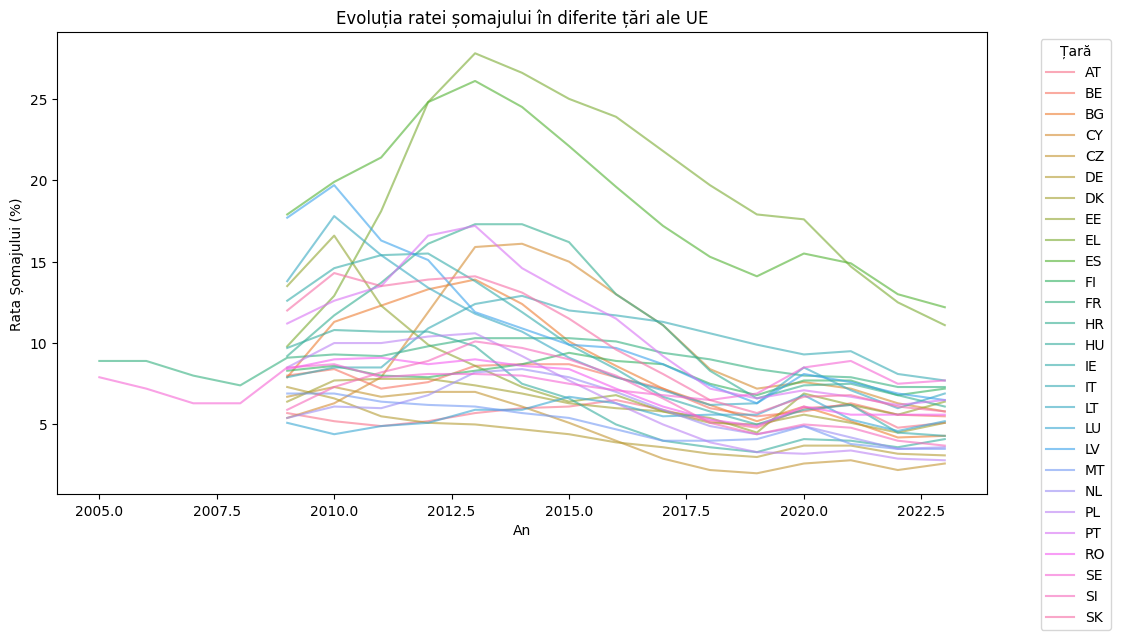

In [14]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="time", y="unemployment_rate", hue="geo", alpha=0.6)
plt.xlabel("An")
plt.ylabel("Rata Șomajului (%)")
plt.title("Evoluția ratei șomajului în diferite țări ale UE")
plt.legend(title="Țară", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


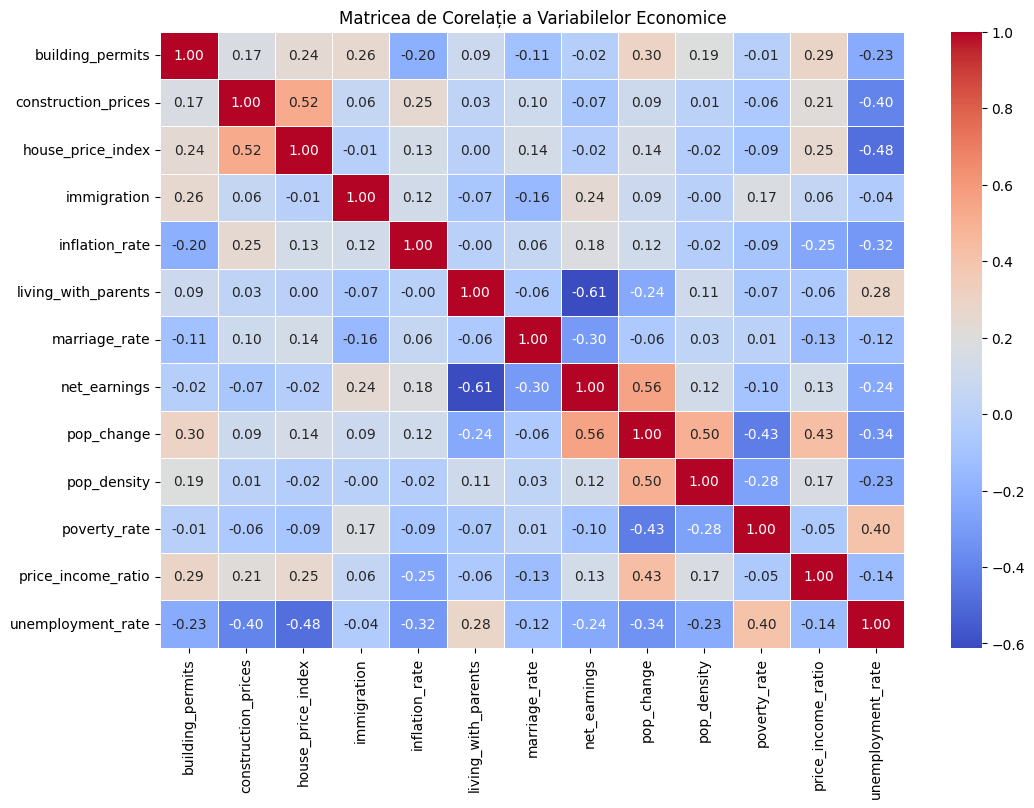

In [20]:
numeric_cols = [col for col in df.columns if col not in ["geo", "time"]]
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matricea de Corelație a Variabilelor Economice")
plt.show()


In [21]:
# Calcul vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[numeric_cols]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data


MissingDataError: exog contains inf or nans